<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_10_Decision_Tree_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [58]:
# import some data to play with
CD  = pd.read_csv('Company_Data.csv')

In [59]:
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [60]:
#first convert sales into categorical variable
CD['Sales_Rating'] = pd.cut(CD.Sales,bins=[0,3,6,10,14,20],
                                      labels=['Bad','Below_Avg','Avg','Good','Excellent'],include_lowest=True)

In [61]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
CD1 = CD[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
CD1.head()

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [62]:
CD = CD.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

In [63]:
CD = pd.concat([CD,CD1], axis=1, sort=False)
CD.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Rating,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,Avg,0,1,1
1,111,48,16,260,83,65,10,Good,1,1,1
2,113,35,10,269,80,59,12,Good,2,1,1
3,117,100,4,466,97,55,14,Avg,2,1,1
4,141,64,3,340,128,38,13,Below_Avg,0,1,0


In [64]:
CD= CD[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","ShelveLoc","Urban","US","Sales_Rating"]]

CD.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales_Rating
0,138,73,11,276,120,42,17,0,1,1,Avg
1,111,48,16,260,83,65,10,1,1,1,Good
2,113,35,10,269,80,59,12,2,1,1,Good
3,117,100,4,466,97,55,14,2,1,1,Avg
4,141,64,3,340,128,38,13,0,1,0,Below_Avg


In [65]:
colnames=list(CD.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc',
 'Urban',
 'US',
 'Sales_Rating']

In [66]:
x=CD.iloc[:,0:10]
y=CD["Sales_Rating"]

In [67]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [68]:
y

0            Avg
1           Good
2           Good
3            Avg
4      Below_Avg
         ...    
395         Good
396          Avg
397          Avg
398    Below_Avg
399          Avg
Name: Sales_Rating, Length: 400, dtype: category
Categories (5, object): ['Bad' < 'Below_Avg' < 'Avg' < 'Good' < 'Excellent']

In [69]:
CD.isnull().any()

CompPrice       False
Income          False
Advertising     False
Population      False
Price           False
Age             False
Education       False
ShelveLoc       False
Urban           False
US              False
Sales_Rating    False
dtype: bool

In [70]:
# Splitting CD training and testing CDset
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [71]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

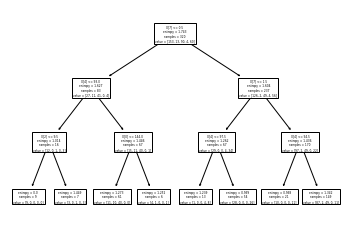

In [72]:
#PLot the decision tree
tree.plot_tree(model);


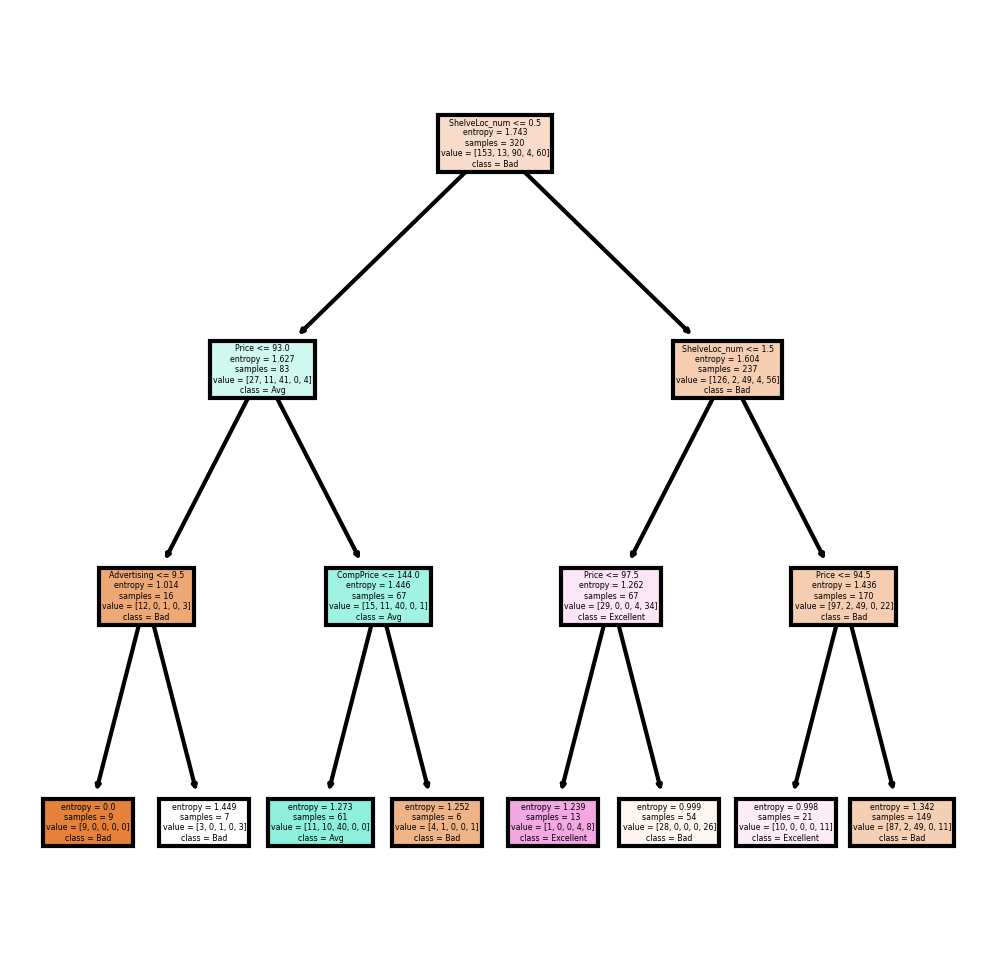

In [75]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_num', 'Urban_num', 'US_num']
cn=['Bad' , 'Below_Avg' , 'Avg' , 'Good' , 'Excellent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [76]:
#Predicting on test CD
preds = model.predict(x_test) # predicting on test CDset 
pd.Series(preds).value_counts() # getting the count of each category 

Avg          54
Good         18
Below_Avg     8
dtype: int64

In [77]:
preds

array(['Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Avg',
       'Good', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Avg', 'Avg', 'Avg', 'Avg',
       'Avg', 'Below_Avg', 'Avg', 'Avg', 'Good', 'Avg', 'Good', 'Avg',
       'Avg', 'Good', 'Avg', 'Below_Avg', 'Avg', 'Avg', 'Avg',
       'Below_Avg', 'Avg', 'Good', 'Avg', 'Avg', 'Below_Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Avg', 'Good', 'Avg',
       'Good', 'Avg', 'Below_Avg', 'Avg', 'Avg', 'Good', 'Avg',
       'Below_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Good',
       'Good', 'Avg', 'Good', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg'],
      dtype=object)

In [78]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Avg,Below_Avg,Good
Sales_Rating,,,
Bad,3,1,0
Below_Avg,18,5,0
Avg,28,2,9
Good,5,0,9


In [79]:
# Accuracy 
np.mean(preds==y_test)

0.525

### Building Decision Tree Classifier (CART) using Gini Criteria

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [81]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.525